## Offsets
offsets were decided based on `1920` by `1080` full screen firefox window using spookfish mapviewer, with a `z index` of 20. `z index` is a parameter in the url determining the image view height, so naturally this will affect what offsets we use.

In [1]:
long_offset = 0.00247
lat_offset = 0.00093

## First create spatial index

In [8]:
import fiona
from rtree import index
from shapely.geometry import asShape, Point

In [3]:
tree_index = index.Index()

In [4]:
australia = fiona.open('../1270055003_lga_2018_aust_shape/LGA_2018_AUST.shp')
victoria = [asShape(lga['geometry']).simplify(tolerance=.000005) for lga in australia if lga['geometry'] is not None and lga['properties']['STE_NAME16'] == 'Victoria']

In [5]:
for index, shape in enumerate(victoria):
    tree_index.insert(index, shape.bounds)

## Grab Victoria Bounds

In [6]:
victoria_box = tree_index.bounds

In [9]:
victoria_box

[140.96168199600004,
 -39.159189527999956,
 149.9762909950001,
 -33.98042558699996]

## Find the Longitudes within Victorias bounding box, given our offset value

In [10]:
possible_longs = []

mutable_longitude = victoria_box[0]

while mutable_longitude < victoria_box[2]:
    mutable_longitude += long_offset
    possible_longs.append(mutable_longitude)

In [11]:
len(possible_longs)

475

## Next, find the latitudes within Victorias bounding box, given our offset value

In [12]:
possible_lats = []

mutable_latitude = victoria_box[1]

while mutable_latitude < victoria_box[3]:
    mutable_latitude += lat_offset
    possible_lats.append(mutable_latitude)

In [13]:
len(possible_lats)

8490

## Next compile into list of `x,y` coordinates

In [14]:
coordinates = []

for x in possible_longs:
    for y in possible_lats:
        coordinates.append((x,y))

## Show length of coordinate list, as well as previewing the tailing 5 sets of coodinates

In [15]:
len(coordinates)

4032750

In [16]:
coordinates[:5]

[(140.98068199600004, -39.158579527999954),
 (140.98068199600004, -39.15796952799995),
 (140.98068199600004, -39.15735952799995),
 (140.98068199600004, -39.15674952799995),
 (140.98068199600004, -39.15613952799995)]

In [17]:
coordinates[-5:]

[(149.98668199600263, -33.98272952798489),
 (149.98668199600263, -33.982119527984885),
 (149.98668199600263, -33.98150952798488),
 (149.98668199600263, -33.98089952798488),
 (149.98668199600263, -33.98028952798488)]

## Now that we know there are just over 4milllion points given the offset tolerance set manually, we want to filter the points down to the ones that arent in the ocean (roughly).
For this particular task we need to intersect points with the lga polygons to check whether theyre valid

In [18]:
valid_coords = []
coord_total = len(coordinates)

for coord_index, coord in enumerate(coordinates):
    
    if coord_index % 2000 == 0:
        print('Processing checkpoint... coordinate index {} out of {}'.format(coord_index, coord_total))
        print('Valid coordinates stands at: {}'.format(len(valid_coords)))
    generator = tree_index.intersection(coord)
    
    indices = list(generator)
    
    if len(indices) > 0:
        
        point = Point(coord)
        
        for index in indices:
        
            if victoria[index].intersects(point):
                
                valid_coords.append(coord)
                
                break

Processing checkpoint... coordinate index 0 out of 4032750
Valid coordinates stands at: 0
Processing checkpoint... coordinate index 2000 out of 4032750
Valid coordinates stands at: 196
Processing checkpoint... coordinate index 4000 out of 4032750
Valid coordinates stands at: 2196
Processing checkpoint... coordinate index 6000 out of 4032750
Valid coordinates stands at: 4196
Processing checkpoint... coordinate index 8000 out of 4032750
Valid coordinates stands at: 6196
Processing checkpoint... coordinate index 10000 out of 4032750
Valid coordinates stands at: 6643
Processing checkpoint... coordinate index 12000 out of 4032750
Valid coordinates stands at: 8355
Processing checkpoint... coordinate index 14000 out of 4032750
Valid coordinates stands at: 10355
Processing checkpoint... coordinate index 16000 out of 4032750
Valid coordinates stands at: 12355
Processing checkpoint... coordinate index 18000 out of 4032750
Valid coordinates stands at: 13270
Processing checkpoint... coordinate ind

Processing checkpoint... coordinate index 168000 out of 4032750
Valid coordinates stands at: 131893
Processing checkpoint... coordinate index 170000 out of 4032750
Valid coordinates stands at: 133450
Processing checkpoint... coordinate index 172000 out of 4032750
Valid coordinates stands at: 134207
Processing checkpoint... coordinate index 174000 out of 4032750
Valid coordinates stands at: 136207
Processing checkpoint... coordinate index 176000 out of 4032750
Valid coordinates stands at: 138207
Processing checkpoint... coordinate index 178000 out of 4032750
Valid coordinates stands at: 140207
Processing checkpoint... coordinate index 180000 out of 4032750
Valid coordinates stands at: 140641
Processing checkpoint... coordinate index 182000 out of 4032750
Valid coordinates stands at: 142641
Processing checkpoint... coordinate index 184000 out of 4032750
Valid coordinates stands at: 144641
Processing checkpoint... coordinate index 186000 out of 4032750
Valid coordinates stands at: 146641


Processing checkpoint... coordinate index 332000 out of 4032750
Valid coordinates stands at: 264271
Processing checkpoint... coordinate index 334000 out of 4032750
Valid coordinates stands at: 265681
Processing checkpoint... coordinate index 336000 out of 4032750
Valid coordinates stands at: 267681
Processing checkpoint... coordinate index 338000 out of 4032750
Valid coordinates stands at: 269681
Processing checkpoint... coordinate index 340000 out of 4032750
Valid coordinates stands at: 271062
Processing checkpoint... coordinate index 342000 out of 4032750
Valid coordinates stands at: 271977
Processing checkpoint... coordinate index 344000 out of 4032750
Valid coordinates stands at: 273977
Processing checkpoint... coordinate index 346000 out of 4032750
Valid coordinates stands at: 275977
Processing checkpoint... coordinate index 348000 out of 4032750
Valid coordinates stands at: 277872
Processing checkpoint... coordinate index 350000 out of 4032750
Valid coordinates stands at: 278297


Processing checkpoint... coordinate index 496000 out of 4032750
Valid coordinates stands at: 396158
Processing checkpoint... coordinate index 498000 out of 4032750
Valid coordinates stands at: 398158
Processing checkpoint... coordinate index 500000 out of 4032750
Valid coordinates stands at: 400158
Processing checkpoint... coordinate index 502000 out of 4032750
Valid coordinates stands at: 400751
Processing checkpoint... coordinate index 504000 out of 4032750
Valid coordinates stands at: 402544
Processing checkpoint... coordinate index 506000 out of 4032750
Valid coordinates stands at: 404544
Processing checkpoint... coordinate index 508000 out of 4032750
Valid coordinates stands at: 406544
Processing checkpoint... coordinate index 510000 out of 4032750
Valid coordinates stands at: 407624
Processing checkpoint... coordinate index 512000 out of 4032750
Valid coordinates stands at: 408939
Processing checkpoint... coordinate index 514000 out of 4032750
Valid coordinates stands at: 410939


Processing checkpoint... coordinate index 660000 out of 4032750
Valid coordinates stands at: 525875
Processing checkpoint... coordinate index 662000 out of 4032750
Valid coordinates stands at: 527119
Processing checkpoint... coordinate index 664000 out of 4032750
Valid coordinates stands at: 527651
Processing checkpoint... coordinate index 666000 out of 4032750
Valid coordinates stands at: 529651
Processing checkpoint... coordinate index 668000 out of 4032750
Valid coordinates stands at: 531651
Processing checkpoint... coordinate index 670000 out of 4032750
Valid coordinates stands at: 533366
Processing checkpoint... coordinate index 672000 out of 4032750
Valid coordinates stands at: 533402
Processing checkpoint... coordinate index 674000 out of 4032750
Valid coordinates stands at: 535402
Processing checkpoint... coordinate index 676000 out of 4032750
Valid coordinates stands at: 537402
Processing checkpoint... coordinate index 678000 out of 4032750
Valid coordinates stands at: 539402


Processing checkpoint... coordinate index 824000 out of 4032750
Valid coordinates stands at: 645080
Processing checkpoint... coordinate index 826000 out of 4032750
Valid coordinates stands at: 646597
Processing checkpoint... coordinate index 828000 out of 4032750
Valid coordinates stands at: 648597
Processing checkpoint... coordinate index 830000 out of 4032750
Valid coordinates stands at: 650597
Processing checkpoint... coordinate index 832000 out of 4032750
Valid coordinates stands at: 651600
Processing checkpoint... coordinate index 834000 out of 4032750
Valid coordinates stands at: 652645
Processing checkpoint... coordinate index 836000 out of 4032750
Valid coordinates stands at: 654645
Processing checkpoint... coordinate index 838000 out of 4032750
Valid coordinates stands at: 656645
Processing checkpoint... coordinate index 840000 out of 4032750
Valid coordinates stands at: 658095
Processing checkpoint... coordinate index 842000 out of 4032750
Valid coordinates stands at: 658679


Processing checkpoint... coordinate index 988000 out of 4032750
Valid coordinates stands at: 770882
Processing checkpoint... coordinate index 990000 out of 4032750
Valid coordinates stands at: 772882
Processing checkpoint... coordinate index 992000 out of 4032750
Valid coordinates stands at: 774882
Processing checkpoint... coordinate index 994000 out of 4032750
Valid coordinates stands at: 775007
Processing checkpoint... coordinate index 996000 out of 4032750
Valid coordinates stands at: 777003
Processing checkpoint... coordinate index 998000 out of 4032750
Valid coordinates stands at: 779003
Processing checkpoint... coordinate index 1000000 out of 4032750
Valid coordinates stands at: 781003
Processing checkpoint... coordinate index 1002000 out of 4032750
Valid coordinates stands at: 781586
Processing checkpoint... coordinate index 1004000 out of 4032750
Valid coordinates stands at: 783112
Processing checkpoint... coordinate index 1006000 out of 4032750
Valid coordinates stands at: 785

Processing checkpoint... coordinate index 1152000 out of 4032750
Valid coordinates stands at: 891709
Processing checkpoint... coordinate index 1154000 out of 4032750
Valid coordinates stands at: 892325
Processing checkpoint... coordinate index 1156000 out of 4032750
Valid coordinates stands at: 893171
Processing checkpoint... coordinate index 1158000 out of 4032750
Valid coordinates stands at: 895171
Processing checkpoint... coordinate index 1160000 out of 4032750
Valid coordinates stands at: 897171
Processing checkpoint... coordinate index 1162000 out of 4032750
Valid coordinates stands at: 898245
Processing checkpoint... coordinate index 1164000 out of 4032750
Valid coordinates stands at: 898575
Processing checkpoint... coordinate index 1166000 out of 4032750
Valid coordinates stands at: 900575
Processing checkpoint... coordinate index 1168000 out of 4032750
Valid coordinates stands at: 902575
Processing checkpoint... coordinate index 1170000 out of 4032750
Valid coordinates stands a

Processing checkpoint... coordinate index 1318000 out of 4032750
Valid coordinates stands at: 996984
Processing checkpoint... coordinate index 1320000 out of 4032750
Valid coordinates stands at: 998984
Processing checkpoint... coordinate index 1322000 out of 4032750
Valid coordinates stands at: 1000930
Processing checkpoint... coordinate index 1324000 out of 4032750
Valid coordinates stands at: 1000930
Processing checkpoint... coordinate index 1326000 out of 4032750
Valid coordinates stands at: 1001543
Processing checkpoint... coordinate index 1328000 out of 4032750
Valid coordinates stands at: 1003543
Processing checkpoint... coordinate index 1330000 out of 4032750
Valid coordinates stands at: 1005543
Processing checkpoint... coordinate index 1332000 out of 4032750
Valid coordinates stands at: 1005978
Processing checkpoint... coordinate index 1334000 out of 4032750
Valid coordinates stands at: 1006086
Processing checkpoint... coordinate index 1336000 out of 4032750
Valid coordinates s

Processing checkpoint... coordinate index 1480000 out of 4032750
Valid coordinates stands at: 1086338
Processing checkpoint... coordinate index 1482000 out of 4032750
Valid coordinates stands at: 1088338
Processing checkpoint... coordinate index 1484000 out of 4032750
Valid coordinates stands at: 1089207
Processing checkpoint... coordinate index 1486000 out of 4032750
Valid coordinates stands at: 1089207
Processing checkpoint... coordinate index 1488000 out of 4032750
Valid coordinates stands at: 1090127
Processing checkpoint... coordinate index 1490000 out of 4032750
Valid coordinates stands at: 1092127
Processing checkpoint... coordinate index 1492000 out of 4032750
Valid coordinates stands at: 1093453
Processing checkpoint... coordinate index 1494000 out of 4032750
Valid coordinates stands at: 1093453
Processing checkpoint... coordinate index 1496000 out of 4032750
Valid coordinates stands at: 1093872
Processing checkpoint... coordinate index 1498000 out of 4032750
Valid coordinates

Processing checkpoint... coordinate index 1642000 out of 4032750
Valid coordinates stands at: 1158705
Processing checkpoint... coordinate index 1644000 out of 4032750
Valid coordinates stands at: 1160370
Processing checkpoint... coordinate index 1646000 out of 4032750
Valid coordinates stands at: 1160370
Processing checkpoint... coordinate index 1648000 out of 4032750
Valid coordinates stands at: 1160370
Processing checkpoint... coordinate index 1650000 out of 4032750
Valid coordinates stands at: 1161578
Processing checkpoint... coordinate index 1652000 out of 4032750
Valid coordinates stands at: 1163578
Processing checkpoint... coordinate index 1654000 out of 4032750
Valid coordinates stands at: 1163701
Processing checkpoint... coordinate index 1656000 out of 4032750
Valid coordinates stands at: 1163701
Processing checkpoint... coordinate index 1658000 out of 4032750
Valid coordinates stands at: 1164379
Processing checkpoint... coordinate index 1660000 out of 4032750
Valid coordinates

Processing checkpoint... coordinate index 1804000 out of 4032750
Valid coordinates stands at: 1219940
Processing checkpoint... coordinate index 1806000 out of 4032750
Valid coordinates stands at: 1221234
Processing checkpoint... coordinate index 1808000 out of 4032750
Valid coordinates stands at: 1221234
Processing checkpoint... coordinate index 1810000 out of 4032750
Valid coordinates stands at: 1221619
Processing checkpoint... coordinate index 1812000 out of 4032750
Valid coordinates stands at: 1223331
Processing checkpoint... coordinate index 1814000 out of 4032750
Valid coordinates stands at: 1225127
Processing checkpoint... coordinate index 1816000 out of 4032750
Valid coordinates stands at: 1225127
Processing checkpoint... coordinate index 1818000 out of 4032750
Valid coordinates stands at: 1225127
Processing checkpoint... coordinate index 1820000 out of 4032750
Valid coordinates stands at: 1226715
Processing checkpoint... coordinate index 1822000 out of 4032750
Valid coordinates

Processing checkpoint... coordinate index 1966000 out of 4032750
Valid coordinates stands at: 1298420
Processing checkpoint... coordinate index 1968000 out of 4032750
Valid coordinates stands at: 1299021
Processing checkpoint... coordinate index 1970000 out of 4032750
Valid coordinates stands at: 1299021
Processing checkpoint... coordinate index 1972000 out of 4032750
Valid coordinates stands at: 1299971
Processing checkpoint... coordinate index 1974000 out of 4032750
Valid coordinates stands at: 1301971
Processing checkpoint... coordinate index 1976000 out of 4032750
Valid coordinates stands at: 1303075
Processing checkpoint... coordinate index 1978000 out of 4032750
Valid coordinates stands at: 1303075
Processing checkpoint... coordinate index 1980000 out of 4032750
Valid coordinates stands at: 1303524
Processing checkpoint... coordinate index 1982000 out of 4032750
Valid coordinates stands at: 1305524
Processing checkpoint... coordinate index 1984000 out of 4032750
Valid coordinates

Processing checkpoint... coordinate index 2128000 out of 4032750
Valid coordinates stands at: 1382572
Processing checkpoint... coordinate index 2130000 out of 4032750
Valid coordinates stands at: 1382572
Processing checkpoint... coordinate index 2132000 out of 4032750
Valid coordinates stands at: 1382761
Processing checkpoint... coordinate index 2134000 out of 4032750
Valid coordinates stands at: 1384761
Processing checkpoint... coordinate index 2136000 out of 4032750
Valid coordinates stands at: 1386761
Processing checkpoint... coordinate index 2138000 out of 4032750
Valid coordinates stands at: 1386990
Processing checkpoint... coordinate index 2140000 out of 4032750
Valid coordinates stands at: 1386990
Processing checkpoint... coordinate index 2142000 out of 4032750
Valid coordinates stands at: 1388707
Processing checkpoint... coordinate index 2144000 out of 4032750
Valid coordinates stands at: 1390707
Processing checkpoint... coordinate index 2146000 out of 4032750
Valid coordinates

Processing checkpoint... coordinate index 2290000 out of 4032750
Valid coordinates stands at: 1470194
Processing checkpoint... coordinate index 2292000 out of 4032750
Valid coordinates stands at: 1470194
Processing checkpoint... coordinate index 2294000 out of 4032750
Valid coordinates stands at: 1471348
Processing checkpoint... coordinate index 2296000 out of 4032750
Valid coordinates stands at: 1473348
Processing checkpoint... coordinate index 2298000 out of 4032750
Valid coordinates stands at: 1474807
Processing checkpoint... coordinate index 2300000 out of 4032750
Valid coordinates stands at: 1474807
Processing checkpoint... coordinate index 2302000 out of 4032750
Valid coordinates stands at: 1475487
Processing checkpoint... coordinate index 2304000 out of 4032750
Valid coordinates stands at: 1477487
Processing checkpoint... coordinate index 2306000 out of 4032750
Valid coordinates stands at: 1479440
Processing checkpoint... coordinate index 2308000 out of 4032750
Valid coordinates

Processing checkpoint... coordinate index 2452000 out of 4032750
Valid coordinates stands at: 1559372
Processing checkpoint... coordinate index 2454000 out of 4032750
Valid coordinates stands at: 1559406
Processing checkpoint... coordinate index 2456000 out of 4032750
Valid coordinates stands at: 1561248
Processing checkpoint... coordinate index 2458000 out of 4032750
Valid coordinates stands at: 1563248
Processing checkpoint... coordinate index 2460000 out of 4032750
Valid coordinates stands at: 1564065
Processing checkpoint... coordinate index 2462000 out of 4032750
Valid coordinates stands at: 1564065
Processing checkpoint... coordinate index 2464000 out of 4032750
Valid coordinates stands at: 1565292
Processing checkpoint... coordinate index 2466000 out of 4032750
Valid coordinates stands at: 1567292
Processing checkpoint... coordinate index 2468000 out of 4032750
Valid coordinates stands at: 1568585
Processing checkpoint... coordinate index 2470000 out of 4032750
Valid coordinates

Processing checkpoint... coordinate index 2616000 out of 4032750
Valid coordinates stands at: 1643314
Processing checkpoint... coordinate index 2618000 out of 4032750
Valid coordinates stands at: 1645314
Processing checkpoint... coordinate index 2620000 out of 4032750
Valid coordinates stands at: 1647271
Processing checkpoint... coordinate index 2622000 out of 4032750
Valid coordinates stands at: 1647271
Processing checkpoint... coordinate index 2624000 out of 4032750
Valid coordinates stands at: 1647271
Processing checkpoint... coordinate index 2626000 out of 4032750
Valid coordinates stands at: 1649013
Processing checkpoint... coordinate index 2628000 out of 4032750
Valid coordinates stands at: 1651013
Processing checkpoint... coordinate index 2630000 out of 4032750
Valid coordinates stands at: 1651464
Processing checkpoint... coordinate index 2632000 out of 4032750
Valid coordinates stands at: 1651464
Processing checkpoint... coordinate index 2634000 out of 4032750
Valid coordinates

Processing checkpoint... coordinate index 2778000 out of 4032750
Valid coordinates stands at: 1720030
Processing checkpoint... coordinate index 2780000 out of 4032750
Valid coordinates stands at: 1722030
Processing checkpoint... coordinate index 2782000 out of 4032750
Valid coordinates stands at: 1723365
Processing checkpoint... coordinate index 2784000 out of 4032750
Valid coordinates stands at: 1723365
Processing checkpoint... coordinate index 2786000 out of 4032750
Valid coordinates stands at: 1723365
Processing checkpoint... coordinate index 2788000 out of 4032750
Valid coordinates stands at: 1725338
Processing checkpoint... coordinate index 2790000 out of 4032750
Valid coordinates stands at: 1727158
Processing checkpoint... coordinate index 2792000 out of 4032750
Valid coordinates stands at: 1727158
Processing checkpoint... coordinate index 2794000 out of 4032750
Valid coordinates stands at: 1727158
Processing checkpoint... coordinate index 2796000 out of 4032750
Valid coordinates

Processing checkpoint... coordinate index 2940000 out of 4032750
Valid coordinates stands at: 1790050
Processing checkpoint... coordinate index 2942000 out of 4032750
Valid coordinates stands at: 1792050
Processing checkpoint... coordinate index 2944000 out of 4032750
Valid coordinates stands at: 1792776
Processing checkpoint... coordinate index 2946000 out of 4032750
Valid coordinates stands at: 1792776
Processing checkpoint... coordinate index 2948000 out of 4032750
Valid coordinates stands at: 1792982
Processing checkpoint... coordinate index 2950000 out of 4032750
Valid coordinates stands at: 1794982
Processing checkpoint... coordinate index 2952000 out of 4032750
Valid coordinates stands at: 1796218
Processing checkpoint... coordinate index 2954000 out of 4032750
Valid coordinates stands at: 1796218
Processing checkpoint... coordinate index 2956000 out of 4032750
Valid coordinates stands at: 1796218
Processing checkpoint... coordinate index 2958000 out of 4032750
Valid coordinates

Processing checkpoint... coordinate index 3102000 out of 4032750
Valid coordinates stands at: 1853552
Processing checkpoint... coordinate index 3104000 out of 4032750
Valid coordinates stands at: 1855536
Processing checkpoint... coordinate index 3106000 out of 4032750
Valid coordinates stands at: 1855544
Processing checkpoint... coordinate index 3108000 out of 4032750
Valid coordinates stands at: 1855544
Processing checkpoint... coordinate index 3110000 out of 4032750
Valid coordinates stands at: 1856140
Processing checkpoint... coordinate index 3112000 out of 4032750
Valid coordinates stands at: 1858140
Processing checkpoint... coordinate index 3114000 out of 4032750
Valid coordinates stands at: 1858580
Processing checkpoint... coordinate index 3116000 out of 4032750
Valid coordinates stands at: 1858580
Processing checkpoint... coordinate index 3118000 out of 4032750
Valid coordinates stands at: 1858676
Processing checkpoint... coordinate index 3120000 out of 4032750
Valid coordinates

Processing checkpoint... coordinate index 3264000 out of 4032750
Valid coordinates stands at: 1898975
Processing checkpoint... coordinate index 3266000 out of 4032750
Valid coordinates stands at: 1898975
Processing checkpoint... coordinate index 3268000 out of 4032750
Valid coordinates stands at: 1898975
Processing checkpoint... coordinate index 3270000 out of 4032750
Valid coordinates stands at: 1898975
Processing checkpoint... coordinate index 3272000 out of 4032750
Valid coordinates stands at: 1900114
Processing checkpoint... coordinate index 3274000 out of 4032750
Valid coordinates stands at: 1900570
Processing checkpoint... coordinate index 3276000 out of 4032750
Valid coordinates stands at: 1900570
Processing checkpoint... coordinate index 3278000 out of 4032750
Valid coordinates stands at: 1900570
Processing checkpoint... coordinate index 3280000 out of 4032750
Valid coordinates stands at: 1901216
Processing checkpoint... coordinate index 3282000 out of 4032750
Valid coordinates

Processing checkpoint... coordinate index 3426000 out of 4032750
Valid coordinates stands at: 1926924
Processing checkpoint... coordinate index 3428000 out of 4032750
Valid coordinates stands at: 1926924
Processing checkpoint... coordinate index 3430000 out of 4032750
Valid coordinates stands at: 1926924
Processing checkpoint... coordinate index 3432000 out of 4032750
Valid coordinates stands at: 1926924
Processing checkpoint... coordinate index 3434000 out of 4032750
Valid coordinates stands at: 1928268
Processing checkpoint... coordinate index 3436000 out of 4032750
Valid coordinates stands at: 1928268
Processing checkpoint... coordinate index 3438000 out of 4032750
Valid coordinates stands at: 1928268
Processing checkpoint... coordinate index 3440000 out of 4032750
Valid coordinates stands at: 1928268
Processing checkpoint... coordinate index 3442000 out of 4032750
Valid coordinates stands at: 1929593
Processing checkpoint... coordinate index 3444000 out of 4032750
Valid coordinates

Processing checkpoint... coordinate index 3588000 out of 4032750
Valid coordinates stands at: 1949914
Processing checkpoint... coordinate index 3590000 out of 4032750
Valid coordinates stands at: 1949914
Processing checkpoint... coordinate index 3592000 out of 4032750
Valid coordinates stands at: 1949914
Processing checkpoint... coordinate index 3594000 out of 4032750
Valid coordinates stands at: 1950385
Processing checkpoint... coordinate index 3596000 out of 4032750
Valid coordinates stands at: 1950983
Processing checkpoint... coordinate index 3598000 out of 4032750
Valid coordinates stands at: 1950983
Processing checkpoint... coordinate index 3600000 out of 4032750
Valid coordinates stands at: 1950983
Processing checkpoint... coordinate index 3602000 out of 4032750
Valid coordinates stands at: 1950983
Processing checkpoint... coordinate index 3604000 out of 4032750
Valid coordinates stands at: 1952038
Processing checkpoint... coordinate index 3606000 out of 4032750
Valid coordinates

Processing checkpoint... coordinate index 3750000 out of 4032750
Valid coordinates stands at: 1968099
Processing checkpoint... coordinate index 3752000 out of 4032750
Valid coordinates stands at: 1968099
Processing checkpoint... coordinate index 3754000 out of 4032750
Valid coordinates stands at: 1968099
Processing checkpoint... coordinate index 3756000 out of 4032750
Valid coordinates stands at: 1968928
Processing checkpoint... coordinate index 3758000 out of 4032750
Valid coordinates stands at: 1968928
Processing checkpoint... coordinate index 3760000 out of 4032750
Valid coordinates stands at: 1968928
Processing checkpoint... coordinate index 3762000 out of 4032750
Valid coordinates stands at: 1968928
Processing checkpoint... coordinate index 3764000 out of 4032750
Valid coordinates stands at: 1969590
Processing checkpoint... coordinate index 3766000 out of 4032750
Valid coordinates stands at: 1969741
Processing checkpoint... coordinate index 3768000 out of 4032750
Valid coordinates

Processing checkpoint... coordinate index 3914000 out of 4032750
Valid coordinates stands at: 1980123
Processing checkpoint... coordinate index 3916000 out of 4032750
Valid coordinates stands at: 1980123
Processing checkpoint... coordinate index 3918000 out of 4032750
Valid coordinates stands at: 1980403
Processing checkpoint... coordinate index 3920000 out of 4032750
Valid coordinates stands at: 1980403
Processing checkpoint... coordinate index 3922000 out of 4032750
Valid coordinates stands at: 1980403
Processing checkpoint... coordinate index 3924000 out of 4032750
Valid coordinates stands at: 1980403
Processing checkpoint... coordinate index 3926000 out of 4032750
Valid coordinates stands at: 1980656
Processing checkpoint... coordinate index 3928000 out of 4032750
Valid coordinates stands at: 1980656
Processing checkpoint... coordinate index 3930000 out of 4032750
Valid coordinates stands at: 1980656
Processing checkpoint... coordinate index 3932000 out of 4032750
Valid coordinates

## Calculate how many points have been eliminated

In [21]:
len(coordinates) -len(valid_coords)

2050761

## Export results to csv

In [22]:
import pandas

In [23]:
data_dict = {'longitude':[], 'latitude':[]}

for coord in valid_coords:
    data_dict['longitude'].append(coord[0])
    data_dict['latitude'].append(coord[1])

In [24]:
data = pandas.DataFrame(data_dict)

In [25]:
data.shape

(1981989, 2)

In [26]:
data.head(15)

,longitude,latitude
0,140.980682,-38.05814
1,140.980682,-38.05753
2,140.980682,-38.05692
3,140.980682,-38.05631
4,140.980682,-38.05570
5,140.980682,-38.05509
6,140.980682,-38.05448
7,140.980682,-38.05387
8,140.980682,-38.05326
9,140.980682,-38.05265


In [27]:
data.to_csv('victorian_coordinates.csv', index = True, index_label = 'row_index')

## Visualize

In [31]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1280x720 with 0 Axes>

<Figure size 1280x720 with 0 Axes>

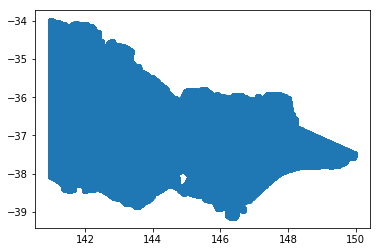

In [32]:
plt.scatter(x = list(data['longitude']),
            y = list(data['latitude']),
            alpha = .8)

In [33]:
plt.show()